In [1]:
import torch
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt
import pickle

In [2]:
resnet18 = models.resnet18(pretrained=True)

Let us look at ResNet18.

In [3]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
aln_lin_1 = resnet18.fc.weight[:].detach().numpy()
print("aln_lin_1", aln_lin_1.shape)

aln_lin_1 (1000, 512)


In [5]:
from analyze_model import Plot2DMatrix, PlotVectorSizes

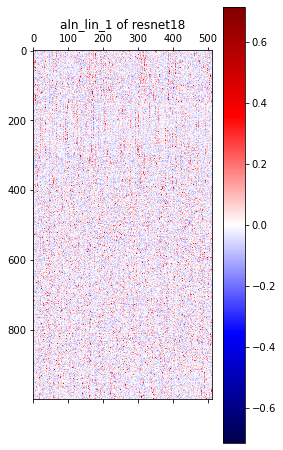

100%|██████████| 1000/1000 [00:01<00:00, 928.51it/s]

There are totally 0 zero elements in this matrix, percentage is 0.0


In [6]:
Plot2DMatrix(aln_lin_1, "aln_lin_1 of resnet18", color_map="seismic")

Now, let us do some pruning on the fully connected layer.

In [7]:
import torch.nn.utils.prune as prune

## global pruning
parameters_to_prune = (
    (resnet18.fc, 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.8,
)

print(
    "Sparsity in fullyconnected_1.weight: {:.2f}%".format(
        100. * float(torch.sum(resnet18.fc.weight == 0))
        / float(resnet18.fc.weight.nelement())
    )
)

Sparsity in fullyconnected_1.weight: 80.00%


In [8]:
compressed_aln_lin_1 = resnet18.fc.weight[:].detach().numpy()
print("compressed_aln_lin_1", compressed_aln_lin_1.shape)

compressed_aln_lin_1 (1000, 512)


100%|██████████| 1000/1000 [00:01<00:00, 927.34it/s]


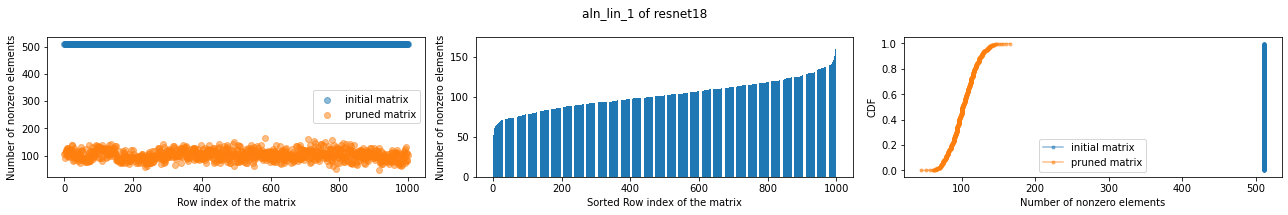

In [9]:
PlotVectorSizes(aln_lin_1, compressed_aln_lin_1, "aln_lin_1 of resnet18", plot_two_matrces=True)

In [10]:
pickle.dump(aln_lin_1, open("../../data/saved_models/resnet18/aln_lin_1.p", "wb" ))
pickle.dump(compressed_aln_lin_1, open("../../data/saved_models/resnet18/compressed_80_aln_lin_1.p", "wb" ))

print("model saved in pickle files")

model saved in pickle files
